## <u> Exploratory Data Analysis And Machine Learning Project </u>

In [1]:
## importing basic libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")

%matplotlib inline

## <u><strong> Importing Data </strong></u>

In [2]:
data=pd.read_csv(r"A:\DS ML\Titanic Survival Prediction\titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### <u><strong>Data Description</u></strong>

###### `Pclass`: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
##### `survival`: Survival (0 = No; 1 = Yes)
##### `name`: Name
##### `sex`: Sex
##### `age`: Age
##### `sibsp`: Number of Siblings/Spouses Aboard
###### `parch`: Number of Parents/Children Aboard
##### `ticket`: Ticket Number
##### `fare`: Passenger Fare (British pound)
##### `cabin`: Cabin
##### `embarked`: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



## <u><strong> Data Analysis </strong></u>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print('Features present in our data :')
print('   ')
print(data.columns)

Features present in our data :
   
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
print(f'Number of Rows and Columns in Data : {data.shape}')

Number of Rows and Columns in Data : (891, 12)


In [7]:
d={}
l=[]
l1=[]

for i in data.columns:
    d[i]=data[i].unique()
    l.append(data[i].nunique())
    l1.append(data[i].isna().sum())
    
explain_data=pd.DataFrame(data=d.items(),columns=['Features','Unique_records'])

In [8]:
explain_data['No_of_unique_records']=pd.Series(l)
explain_data['No_of_missing_records']=pd.Series(l1)
explain_data['percentage_of_missing_records']=round((explain_data['No_of_missing_records']/len(data)),2)

In [9]:
explain_data

,Features,Unique_records,No_of_unique_records,No_of_missing_records,percentage_of_missing_records
0,PassengerId,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",891,0,0.00
1,Survived,"[0, 1]",2,0,0.00
2,Pclass,"[3, 1, 2]",3,0,0.00
3,Name,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B...",891,0,0.00
4,Sex,"[male, female]",2,0,0.00
5,Age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",88,177,0.20
6,SibSp,"[1, 0, 3, 4, 2, 5, 8]",7,0,0.00
7,Parch,"[0, 1, 2, 5, 3, 4, 6]",7,0,0.00
8,Ticket,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803...",681,0,0.00
9,Fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",248,0,0.00


In [10]:
cat_cols=[col for col in data.columns if data[col].dtype=='O']
num_cols=[col for col in data.columns if data[col].dtype!='O']

In [11]:
print(f'Number of Categorical Columns : {len(cat_cols)}')
print('   ')
print(f'Number of Numerical Columns : {len(num_cols)}')

Number of Categorical Columns : 5
   
Number of Numerical Columns : 7


In [12]:
## making copy of the original dataset 

df=data.copy()

## <u><strong> Feature Engineering-1 </strong></u>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df['No_of_family_members']=df['SibSp']+df['Parch']

In [15]:
def cabinType(x):
    try:
        return x[0]
    except:
        return np.NaN
        
        
df['Cabin_type']=df['Cabin'].apply(cabinType)

In [16]:
def is_married(x):
    l=x.split(" ")[1]
    if l=='Mr.' or l=='Mrs.':
        return 1
    else:
        return 0
    
df['Is_Married']=df['Name'].apply(is_married)    

In [17]:
## droping columns 
df.drop(labels=['Parch','SibSp','Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [18]:
d={}
l=[]
l1=[]

for i in df.columns:
    d[i]=df[i].unique()
    l.append(df[i].nunique())
    l1.append(df[i].isna().sum())
    
explain_df=pd.DataFrame(data=d.items(),columns=['Features','Unique_records'])

explain_df['No_of_unique_records']=pd.Series(l)
explain_df['No_of_missing_records']=pd.Series(l1)
explain_df['percentage_of_missing_records']=round((explain_df['No_of_missing_records']/len(df)),2)



explain_df

,Features,Unique_records,No_of_unique_records,No_of_missing_records,percentage_of_missing_records
0,Survived,"[0, 1]",2,0,0.00
1,Pclass,"[3, 1, 2]",3,0,0.00
2,Sex,"[male, female]",2,0,0.00
3,Age,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",88,177,0.20
4,Fare,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",248,0,0.00
5,Embarked,"[S, C, Q, nan]",3,2,0.00
6,No_of_family_members,"[1, 0, 4, 2, 6, 5, 3, 7, 10]",9,0,0.00
7,Cabin_type,"[nan, C, E, G, D, A, B, F, T]",8,687,0.77
8,Is_Married,"[1, 0]",2,0,0.00


In [19]:
cat_cols=[col for col in df.columns if df[col].dtype=='O']
num_cols=[col for col in df.columns if df[col].dtype!='O']

In [20]:
print(f'Categorical Columns : {cat_cols}')
print('  ' )
print(f'Numerical Columns : {num_cols}')

Categorical Columns : ['Sex', 'Embarked', 'Cabin_type']
  
Numerical Columns : ['Survived', 'Pclass', 'Age', 'Fare', 'No_of_family_members', 'Is_Married']


In [21]:
for i in df.columns:
    if df[i].nunique()>=10:
        pass
    else:
        print(f'{i}')
        x=df[i].value_counts().sort_values(ascending=False)
        print(x)
        print('   ')

Survived
0    549
1    342
Name: Survived, dtype: int64
   
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
   
Sex
male      577
female    314
Name: Sex, dtype: int64
   
Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64
   
No_of_family_members
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: No_of_family_members, dtype: int64
   
Cabin_type
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_type, dtype: int64
   
Is_Married
1    623
0    268
Name: Is_Married, dtype: int64
   


###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

## <u><strong>Data Vizulaization</strong></u>

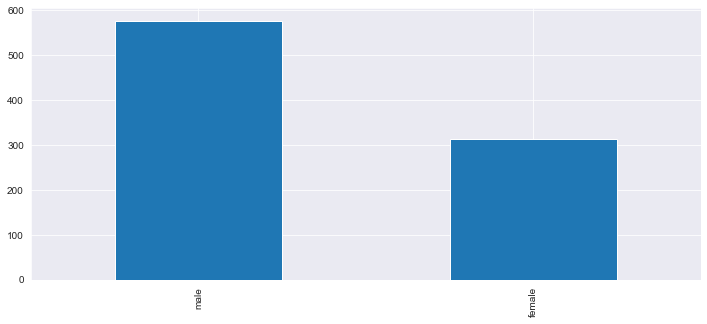

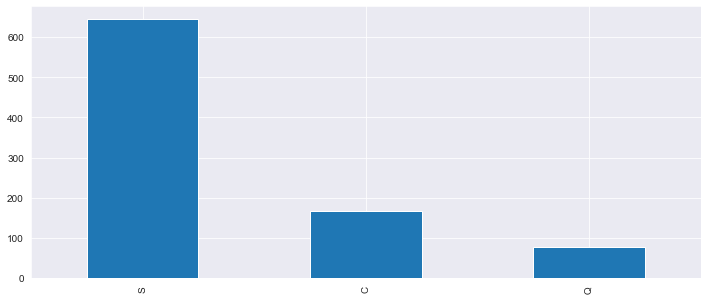

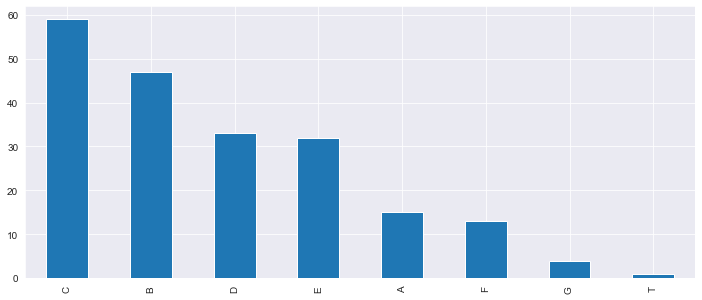

In [22]:
for i in cat_cols:
    plt.figure(figsize=(12,5))
    df[i].value_counts().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='Age', ylabel='Count'>

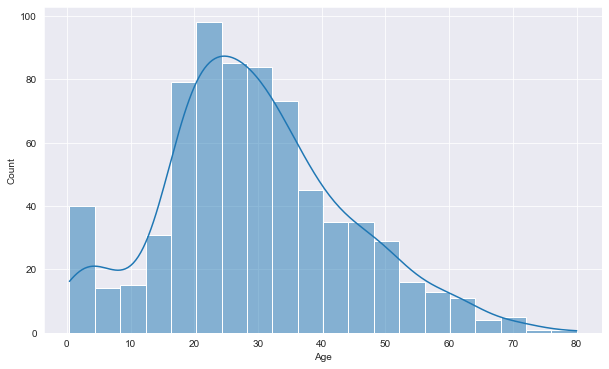

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],kde=True)

<AxesSubplot:xlabel='No_of_family_members', ylabel='count'>

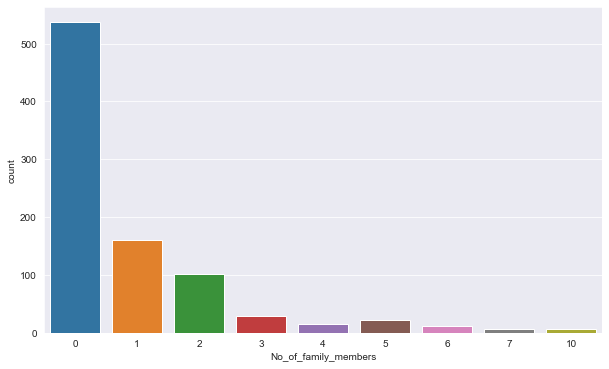

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='No_of_family_members',data=df)

<AxesSubplot:xlabel='Fare'>

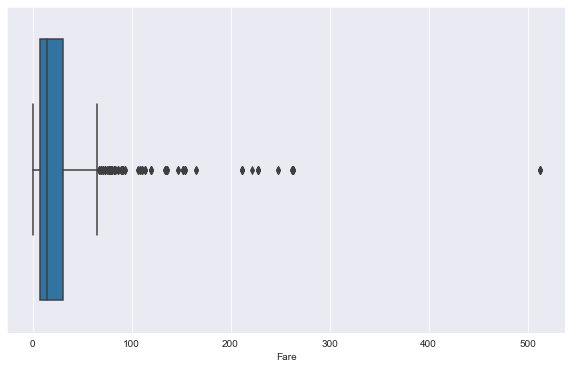

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Fare'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

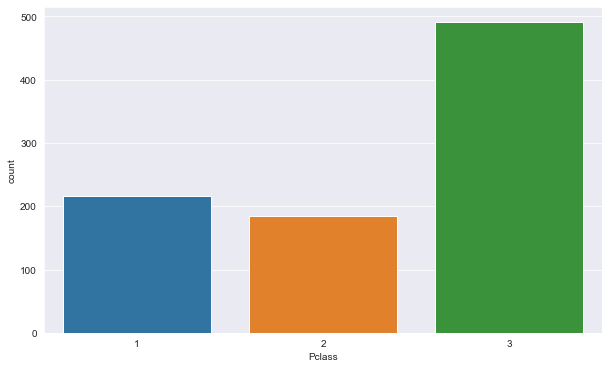

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass',data=df)

<AxesSubplot:xlabel='Is_Married', ylabel='count'>

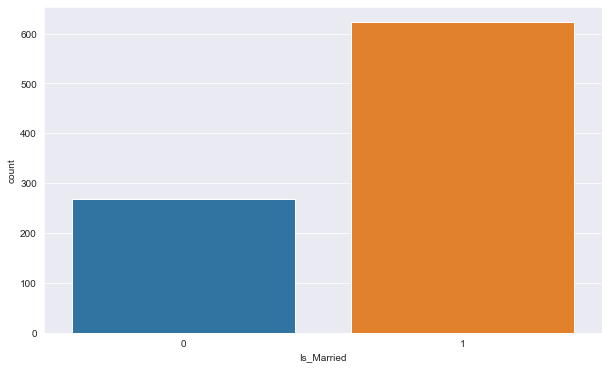

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Is_Married',data=df)

#### Maximum number of passengers in titanic was from `3rd class`

#### Only `33.94%` of the passengers survived 

#### `64%` of the total pasangers were `Male` 

#### Most of the pasengers belongs to `15-35` years age group

#### Maximum people were travelling `Solo`

#### most of the passengers are in `S` embarked 

#### More than `50%` of passengers were in Cabin` B` and `C` 

#### `T` has the least number of passenger

#### Approx `70%` of the passengers were `Married` 

###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------

## <u><em>Bi-variate Analysis</u></em>

<AxesSubplot:xlabel='Pclass', ylabel='count'>

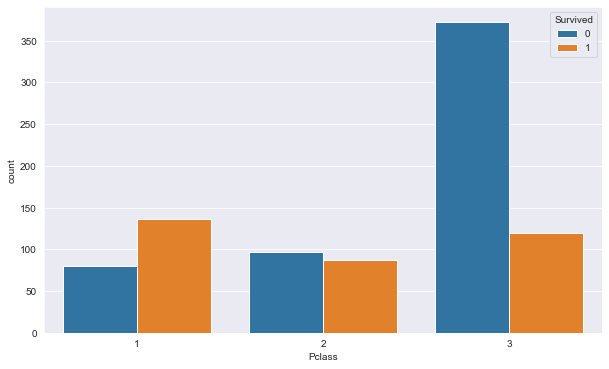

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass',data=df,hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

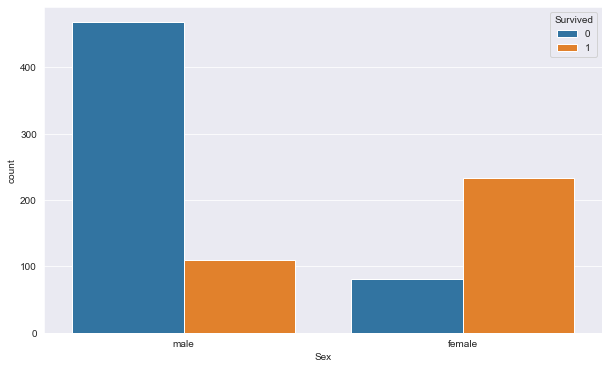

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex',data=df,hue="Survived")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

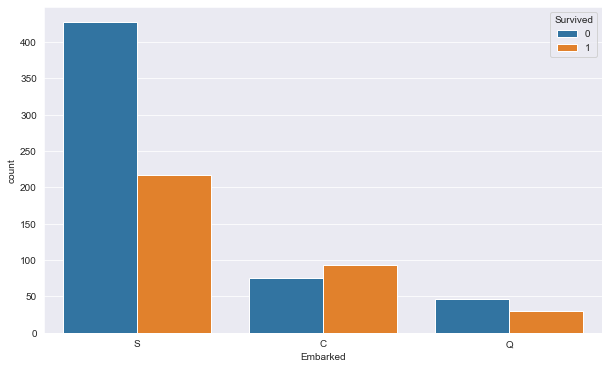

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='Embarked',data=df,hue='Survived')

<AxesSubplot:xlabel='Is_Married', ylabel='count'>

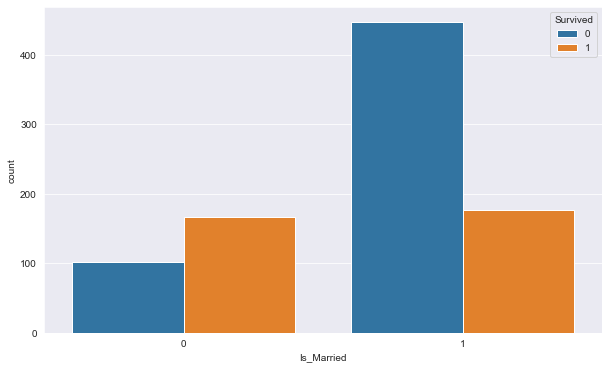

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='Is_Married',data=df,hue='Survived')

<AxesSubplot:xlabel='Cabin_type', ylabel='count'>

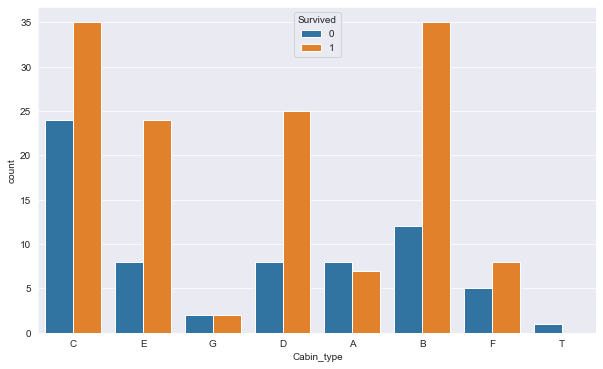

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='Cabin_type',data=df,hue='Survived')

<AxesSubplot:xlabel='Is_Married', ylabel='count'>

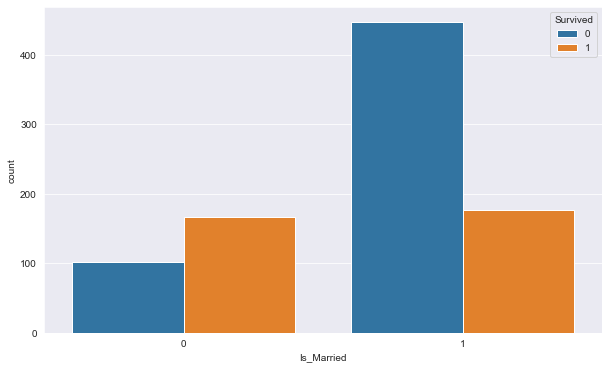

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='Is_Married',data=df,hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

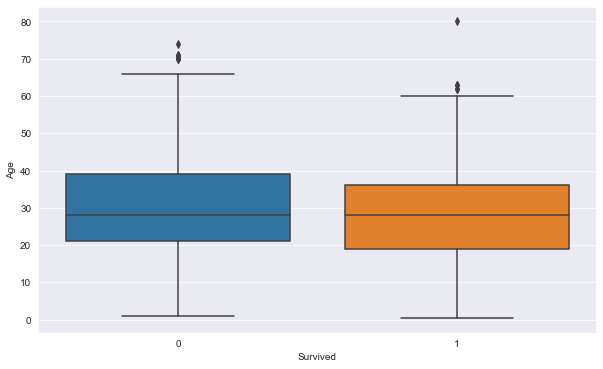

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Age',data=df,x='Survived')

<AxesSubplot:xlabel='No_of_family_members', ylabel='count'>

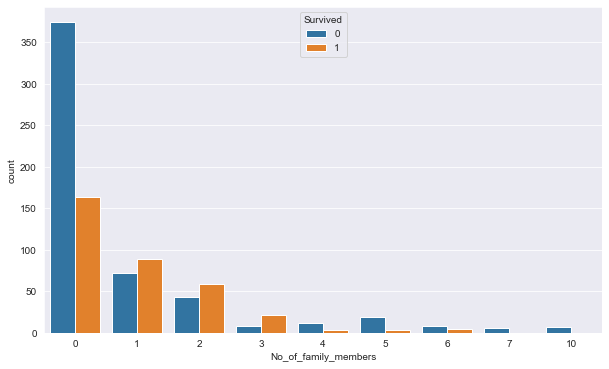

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='No_of_family_members',data=df,hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

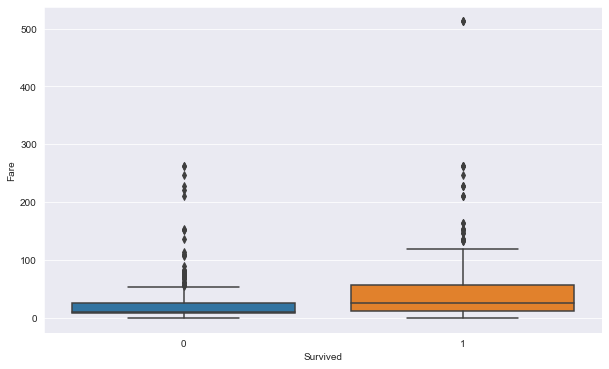

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Fare',data=df,x='Survived')

#### Passengers in `C` emabarked has highest survival rate

#### `Females` has more survival rate than man

#### People with `1 companion` aboard has more survival rate than others 

#### most of the people who survived are from `1st class` and maximum number of people died were from `3rd class`

#### Married Passengers had `less` chance of surviving

#### Passenger travelling with upto `3 members` had more chances of survivng 

#### 

## --------------------------------------------------------------------------------------------------------

## <u><strong> Data PreProcessing </strong></u>

In [37]:
df.to_csv(r"A:\DS ML\Titanic Survival Prediction\new_df.csv")

### <em> Filling mising Values </em>

In [38]:
age=df['Age'].mean()
cabin='C'

df['Age'].fillna(value=age,inplace=True)
df['Cabin_type'].fillna(value=cabin,inplace=True)

In [39]:
df.isna().sum()

Survived                0
Pclass                  0
Sex                     0
Age                     0
Fare                    0
Embarked                2
No_of_family_members    0
Cabin_type              0
Is_Married              0
dtype: int64

### <em> Dealing with Outliers </em>

In [40]:
def limits(x):
    x=sorted(x)
    Q1,Q3=np.percentile(x,[25,75])
    IQR=Q3-Q1
    
    up=Q3+(1.5*IQR)
    low=Q1-(1.5*IQR)
    if low<0:
        low=0
    
    return low,up

In [41]:
age_low,age_up=limits(df['Age'])

In [42]:
fare_low,fare_up=limits(df['Fare'])

In [43]:
print(f'Lower and upper limit of Age : {age_low,age_up}')
print('')
print(f'Lower and upper limit of Fare : {fare_low,fare_up}')

Lower and upper limit of Age : (2.5, 54.5)

Lower and upper limit of Fare : (0, 65.6344)


In [44]:
df['Age'] = np.where(
    df['Age'] > age_up,
    age_up,
    np.where(
        df['Age'] < age_low,
        age_low,
        df['Age']
    )
)

df['Fare'] = np.where(
    df['Fare'] > fare_up,
    fare_up,
    np.where(
        df['Fare'] < fare_low,
        fare_low,
        df['Fare']
    )
)

## <u><strong> Feature Engineering-2 </strong></u>

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              891 non-null    int64  
 1   Pclass                891 non-null    int64  
 2   Sex                   891 non-null    object 
 3   Age                   891 non-null    float64
 4   Fare                  891 non-null    float64
 5   Embarked              889 non-null    object 
 6   No_of_family_members  891 non-null    int64  
 7   Cabin_type            891 non-null    object 
 8   Is_Married            891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [46]:
ordinal_col=['Pclass']
Nominal_col=['Sex','Embarked']

In [47]:
def ordinal_encoding(x):
    if x==3:
        return 1
    elif x==2:
        return 2
    elif x==1:
        return 3
    
df['Pclass']=df['Pclass'].apply(ordinal_encoding)

In [48]:
df.drop('Cabin_type',axis=1,inplace=True)

In [49]:
## Encoding Nominal Columns

df=pd.get_dummies(data=df,columns=Nominal_col,drop_first=True)

### <em> Spliting data </em>

In [50]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
X_train.head()

,Pclass,Age,Fare,No_of_family_members,Is_Married,Sex_male,Embarked_Q,Embarked_S
331,3,45.5,28.5000,0,1,1,0,1
733,2,23.0,13.0000,0,1,1,0,1
382,1,32.0,7.9250,0,1,1,0,1
704,1,26.0,7.8542,1,1,1,0,1
813,1,6.0,31.2750,6,0,0,0,1


In [53]:
X_test.head()

,Pclass,Age,Fare,No_of_family_members,Is_Married,Sex_male,Embarked_Q,Embarked_S
709,1,29.699118,15.2458,2,0,1,0,0
439,2,31.000000,10.5000,0,1,1,0,1
840,1,20.000000,7.9250,0,1,1,0,1
720,2,6.000000,33.0000,1,0,0,0,1
39,1,14.000000,11.2417,1,0,0,0,0


In [54]:
len(X_train.columns)

8

In [55]:
len(X_test.columns)

8

## <em> Feature Selection <em>

In [56]:
from sklearn.feature_selection import mutual_info_classif

mutual_info=mutual_info_classif(X_train,y_train)

In [57]:
mutual_info

array([0.04046873, 0.04023641, 0.10508345, 0.05062359, 0.04718217,
       0.14460558, 0.        , 0.00697198])

In [58]:
feat_imp=pd.DataFrame(data=mutual_info,index=X_train.columns,columns=['Importance'])
feat_imp

,Importance
Pclass,0.040469
Age,0.040236
Fare,0.105083
No_of_family_members,0.050624
Is_Married,0.047182
Sex_male,0.144606
Embarked_Q,0.000000
Embarked_S,0.006972


<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

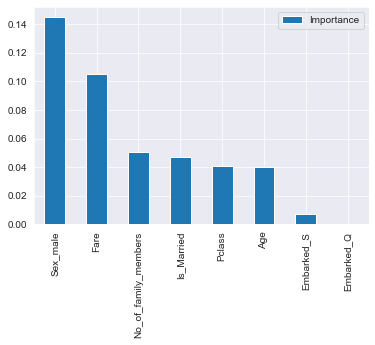

In [59]:
plt.figure(figsize=(10,6))
feat_imp.sort_values(by='Importance',ascending=False).plot.bar()

##### ---------------------------------------------------------------------------------------------------------------------

## <u><strong>Machine Learning Model</strong></u>

In [60]:
## Importing ML Algorithmns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier



In [61]:
def fit_model(model):
    clf=model()
    clf.fit(X_train,y_train)
    return clf.predict(X_test)
    

## <u><em>Evaluating model</em></u>

In [62]:
### Importing Evaluation metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [63]:
def evaluate_model(y_pred):
    score=accuracy_score(y_test,y_pred)
    con=confusion_matrix(y_test,y_pred)
    report=classification_report(y_test,y_pred)
    print(f'The Accuracy of the Model is : {round(score*100,2)}')
    print(' ')
    print("Confusion Matrix")
    print(con)
    print(' ')
    print('Classification Report')
    print(report)

## <em><strong> Logistic Regression </strong></em>

In [64]:
y_pred_lr=fit_model(LogisticRegression)

C:\Users\Chauh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
evaluate_model(y_pred_lr)

The Accuracy of the Model is : 80.45
 
Confusion Matrix
[[90 15]
 [20 54]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## <em><strong> Decision Tree </strong></em>

In [66]:
y_pred_dt=fit_model(DecisionTreeClassifier)

In [67]:
evaluate_model(y_pred_dt)

The Accuracy of the Model is : 78.21
 
Confusion Matrix
[[85 20]
 [19 55]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       105
           1       0.73      0.74      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



## <em><strong> Random Forest </strong></em>

In [68]:
y_pred_rfc=fit_model(RandomForestClassifier)

In [69]:
evaluate_model(y_pred_rfc)

The Accuracy of the Model is : 82.12
 
Confusion Matrix
[[91 14]
 [18 56]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## <em><strong> Ada Boost</em></strong>

In [70]:
y_pred_ada=fit_model(AdaBoostClassifier)

In [71]:
evaluate_model(y_pred_ada)

The Accuracy of the Model is : 80.45
 
Confusion Matrix
[[89 16]
 [19 55]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



## <em><strong> XGBoost </em></strong>

In [72]:
y_pred_xgb=fit_model(XGBClassifier)

[19:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Chauh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [73]:
evaluate_model(y_pred_xgb)

The Accuracy of the Model is : 80.45
 
Confusion Matrix
[[89 16]
 [19 55]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



###  --------------------------------------------------------------------------------------------------------------------------------

### We got Highest Accuracy of 83 % from Random Forest Classifier

In [74]:
## Hyper parameter Tunning 

from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier()

In [75]:
grid={
    'criterion':['gini','entropy'],
    'max_features':["auto", "sqrt", "log2"]
}

gcv=GridSearchCV(estimator=rfc,param_grid=grid,cv=5)
gcv.fit(X_train,y_train)
gcv.best_params_

{'criterion': 'entropy', 'max_features': 'log2'}

In [76]:
gcv_clf=RandomForestClassifier(criterion='entropy',max_features='auto')

In [77]:
gcv_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [78]:
gcv_pred=gcv_clf.predict(X_test)

In [79]:
evaluate_model(gcv_pred)

The Accuracy of the Model is : 82.68
 
Confusion Matrix
[[91 14]
 [17 57]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [81]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [83]:
import pickle

pickle.dump(rfc,open('Titanic.pkl','wb'))